<a href="https://colab.research.google.com/github/ELBITI/KNN-Diabetes-Prediction/blob/main/KNN_for_classificatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd


df = pd.read_csv('diabetes.csv')

dimension  = df.shape

df.dropna()
df.drop_duplicates()

resumer = df.info()

caracteristique = df.describe()

occu = df['Outcome'].value_counts()


print('1. la dimension : ', dimension )

print('\n2. Resumer de donner: ', resumer )

print('\n3. Caracteristique descriptive: ', caracteristique )
print('\n4. Occurence par classe: ', occu )






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   767 non-null    int64  
 1   BloodPressure             767 non-null    int64  
 2   Insulin                   767 non-null    int64  
 3   BMI                       767 non-null    float64
 4   DiabetesPedigreeFunction  767 non-null    float64
 5   Age                       767 non-null    int64  
 6   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB
1. la dimension :  (767, 7)

2. Resumer de donner:  None

3. Caracteristique descriptive:            Glucose  BloodPressure     Insulin         BMI  \
count  767.000000     767.000000  767.000000  767.000000   
mean   120.930900      69.104302   79.903520   31.994654   
std     31.977581      19.368410  115.283105    7.889095   
min      0.000000  

Model (k=1) : [train: 1.0, test: 0.69140625] 


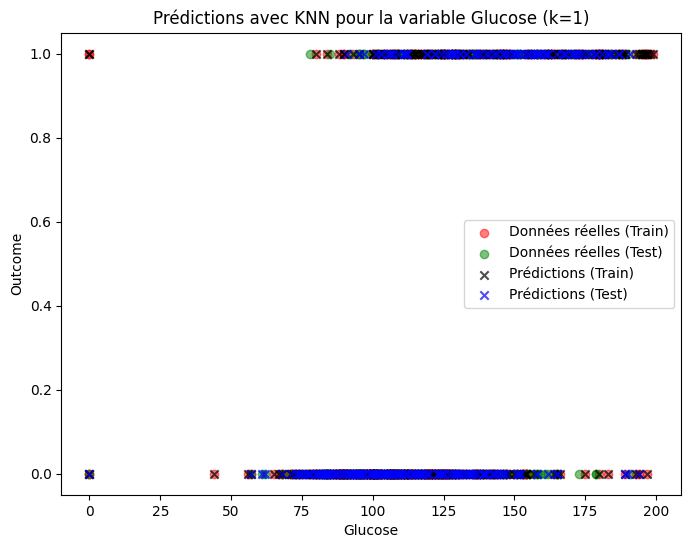

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
X = df.drop(columns=['Outcome'])  # Toutes les variables sauf 'Outcome'
Y = df['Outcome']  # Variable cible (Outcome)

# Séparation des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Initialisation du modèle KNN avec k=1 (surapprentissage attendu)
n = 1
model = KNeighborsClassifier(n_neighbors=n)
model.fit(X_train, y_train)

# Prédiction sur les ensembles d'entraînement et de test
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

# Calcul de l'accuracy pour l'ensemble de test et d'entraînement
accuracy_score_test = accuracy_score(y_test, y_predict_test)
accuracy_score_train = accuracy_score(y_train, y_predict_train)

print(f"Model (k={n}) : [train: {accuracy_score_train}, test: {accuracy_score_test}] ")

# Sélectionner uniquement la variable 'Glucose' pour afficher
X_train_glucose = X_train[['Glucose']]
X_test_glucose = X_test[['Glucose']]

# Création du graphique
plt.figure(figsize=(8, 6))

# Affichage des données réelles pour 'Glucose' (ensemble d'entraînement)
plt.scatter(X_train_glucose, y_train, color='r', label="Données réelles (Train)", alpha=0.5)

# Affichage des données réelles pour 'Glucose' (ensemble de test)
plt.scatter(X_test_glucose, y_test, color='g', label="Données réelles (Test)", alpha=0.5)

# Affichage des prédictions pour 'Glucose' (ensemble d'entraînement)
plt.scatter(X_train_glucose, y_predict_train, color='black', marker='x', label="Prédictions (Train)", alpha=0.7)

# Affichage des prédictions pour 'Glucose' (ensemble de test)
plt.scatter(X_test_glucose, y_predict_test, color='blue', marker='x', label="Prédictions (Test)", alpha=0.7)

# Ajouter une légende et des labels
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title(f'Prédictions avec KNN pour la variable Glucose (k={n})')

# Affichage du graphique
plt.show()


On remarque un suraprentissage : k=1 :

Avec
k=1, le modèle ne prend en compte qu'un seul voisin pour effectuer une prédiction.
Cela rend le modèle très sensible aux anomalies ou au bruit dans les données d'entraînement.
Conséquence : le modèle "mémorise" les données au lieu d'apprendre des motifs généralisables.

k=1 :

Pour réduire le surapprentissage et améliorer la généralisation, voici quelques solutions :

Augmenter la valeur de
k :

Une valeur plus grande de
k (par exemple
𝑘
=
3
,
5
,
7
k=3,5,7) permet de lisser les prédictions, car le modèle considérera plusieurs voisins avant de prendre une décision.
Cela aide à réduire l'effet des anomalies ou du bruit dans les données.

***Remarque : ***
les points noirs (prédictions sur l'entraînement) sont alignés avec les points rouges (données réelles sur l'entraînement) mais que les points bleus (prédictions sur le test) sont mal positionnés par rapport aux points verts (données réelles sur le test), cela montre un surapprentissage.

In [49]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_predict_test)

print("Matrice de confusion : ")
print(conf_matrix)

Matrice de confusion : 
[[130  37]
 [ 42  47]]


Interprétation :
Vrais Négatifs (TN) : 130
Les 130 vrais négatifs correspondent aux individus de la classe 0 (non diabétiques) qui ont été correctement classés comme non diabétiques. C'est un bon résultat, mais comparé au nombre total de non diabétiques (499), cela montre que la majorité des non diabétiques a été correctement classée.

Faux Positifs (FP) : 37
Les 37 faux positifs sont des individus de la classe 0 qui ont été mal classés comme diabétiques (classe 1). Ce nombre est relativement faible par rapport au nombre total de non diabétiques (499), mais ce sont quand même des erreurs où des personnes non diabétiques ont été faussement identifiées comme diabétiques. Cela peut conduire à des interventions médicales inutiles.

Faux Négatifs (FN) : 42
Les 42 faux négatifs représentent des individus diabétiques (classe 1) qui ont été mal classés comme non diabétiques (classe 0). C'est un cas plus grave, car ces individus n'ont pas été identifiés comme diabétiques, ce qui pourrait signifier qu'ils ne reçoivent pas les soins appropriés à temps. Comparé au nombre total de diabétiques (268), cela représente environ 15,7% des vrais diabétiques mal classés, ce qui est relativement élevé et peut être préoccupant.

Vrais Positifs (TP) : 47
Les 47 vrais positifs sont des individus de la classe 1 (diabétiques) qui ont été correctement identifiés comme diabétiques. Cependant, comparé au nombre total de diabétiques (268), seulement 17.5% des diabétiques ont été correctement identifiés. Cela signifie que le modèle a du mal à prédire les individus diabétiques.

Problèmes de déséquilibre des classes :
Le problème principal ici réside dans le déséquilibre des classes, avec beaucoup plus de personnes non diabétiques (499) que de personnes diabétiques (268). Cette distribution a un impact majeur sur les performances du modèle.

Dans un cas de déséquilibre de classe, il est courant que le modèle préfère prédire la classe majoritaire (dans ce cas, la classe 0, non diabétique), car cela lui permet d'atteindre un score de précision élevé sans avoir à bien prédire les instances de la classe minoritaire (diabétiques). Cela pourrait expliquer les faibles résultats en termes de vrais positifs (TP) et de rappels (recall) pour la classe 1.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
X = df.drop(columns=['Outcome'])  # Toutes les variables sauf 'Outcome'
Y = df['Outcome']  # Variable cible (Outcome)

# Séparation des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Initialisation du modèle KNN avec k=1 (surapprentissage attendu

for n in range(1,20):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)
  y_predict_test = model.predict(X_test)
  y_predict_train = model.predict(X_train)
  accuracy_score_test = accuracy_score(y_test, y_predict_test)
  accuracy_score_train = accuracy_score(y_train, y_predict_train)

  print(f"Model (k={n}) : [train: {accuracy_score_train}, test: {accuracy_score_test}] ")




Model (k=1) : [train: 1.0, test: 0.69140625] 
Model (k=2) : [train: 0.8454011741682974, test: 0.7109375] 
Model (k=3) : [train: 0.8454011741682974, test: 0.70703125] 
Model (k=4) : [train: 0.8199608610567515, test: 0.73828125] 
Model (k=5) : [train: 0.8160469667318982, test: 0.73828125] 
Model (k=6) : [train: 0.7964774951076321, test: 0.75] 
Model (k=7) : [train: 0.7906066536203522, test: 0.734375] 
Model (k=8) : [train: 0.7925636007827789, test: 0.7265625] 
Model (k=9) : [train: 0.7886497064579256, test: 0.734375] 
Model (k=10) : [train: 0.7788649706457925, test: 0.73046875] 
Model (k=11) : [train: 0.7886497064579256, test: 0.75390625] 
Model (k=12) : [train: 0.776908023483366, test: 0.73046875] 
Model (k=13) : [train: 0.786692759295499, test: 0.72265625] 
Model (k=14) : [train: 0.7749510763209393, test: 0.73046875] 
Model (k=15) : [train: 0.7827788649706457, test: 0.734375] 
Model (k=16) : [train: 0.7710371819960861, test: 0.72265625] 
Model (k=17) : [train: 0.7710371819960861, test:

**Conclusion :**
Le modèle avec k=6 semble être le plus performant, car il donne le meilleur score de test de 0.75